## Keras - Dense
- 레이어가 두개면 add가 2번
- 아웃풋이 2면 Dense(2), input_shape => 입력할 행의 칼럼의 갯수

- 첫번째 Dence의 input_shape의 값은 X의 칼럼 갯수
- 레이어내 모든 Dense의 activation은 relu를 지정

             activatio(활성화 함수)    loss(손실함수)
      회귀       linear                   mse (마지막 Dense의 출력값은 1)  
      이진분류   sigmoid           binary_crossentropy
      다중분류   softmax     sparse_categorical_crossentropy 
                           (마지막 Dense의 출력값은 분류 종류갯수)
categorical_crossentropy -> 종속 변수는 one hot encoding 형태로 반환  
ex) 답이 0 0 1 : 2로 해석(1이 2번에 있음)  
sparse_categorical_crossentropy -> 종속 변수는 숫자 형태로 반환  
답 2로 반환

In [33]:
# xor문제
import tensorflow as tf
import numpy as np
tf.random.set_seed(777)

# X -> 독립변수, 2차원이상
X = np.array([[0,0],[0,1],[1,0],[1,1]], dtype=np.float32)
y = np.array([0,1,1,0], dtype=np.float32)

# 모델 구축
model = tf.keras.Sequential()

# 레이어 추가
# Dense 밀접, 밀집한
# 첫번째 레이어는 반드시 input_shape 파라미터 지정
model.add(tf.keras.layers.Dense(2, activation="sigmoid",input_shape=(2,))) #출력 노드수 2로 설정
# 마지막 레이어는 1로 설정
model.add(tf.keras.layers.Dense(1, activation="sigmoid")) #출력 노드수 1로 설정
model.summary()

# 컴파일
model.compile(loss="binary_crossentropy",
             optimizer="adam",
             metrics=["accuracy"]) # 보조 측정 (정확도 증가)

# 학습
# epochs => X, y를 가지고 학습할 횟수(반복 횟수)
model.fit(X,y,epochs=5000,verbose=0)
model.evaluate(X,y)

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 2)                 6         
                                                                 
 dense_18 (Dense)            (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 149ms/step - loss: 0.0965 - accuracy: 1.0000


[0.0964551493525505, 1.0]

In [34]:
hist = model.fit(X,y,epochs=5000,verbose=0)

In [21]:
print(model.predict([[0,0]]))
print(model.predict([[1,0]]))
print(model.predict([[0,1]]))
print(model.predict([[1,1]]))

[[0.10165489]]
[[0.895663]]
[[0.9188246]]
[[0.08035585]]


In [35]:
hist.history.keys()

dict_keys(['loss', 'accuracy'])

In [36]:
hist.history["loss"][:10]

[0.0964551493525505,
 0.09641598910093307,
 0.09637684375047684,
 0.0963377058506012,
 0.09629857540130615,
 0.0962594673037529,
 0.09622041881084442,
 0.09618133306503296,
 0.09614230692386627,
 0.09610329568386078]

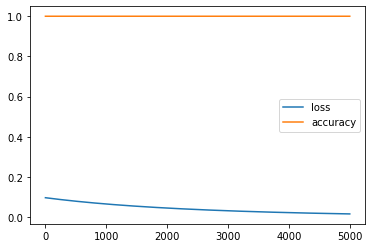

In [37]:
import matplotlib.pyplot as plt
plt.plot(hist.history["loss"], label="loss")
plt.plot(hist.history["accuracy"], label="accuracy")
plt.legend()

## iris 딥러닝

In [50]:
from sklearn.datasets import load_iris

iris = load_iris()
iris.data.shape, iris.target.shape

((150, 4), (150,))

In [41]:
from sklearn.model_selection import train_test_split

x_tr, x_te, y_tr, y_te = train_test_split(iris.data, iris.target, random_state=0, test_size=0.2)

In [51]:
# NN 다중분류 모델 구축
import tensorflow as tf

model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(4, activation="relu", input_shape=(4,)))
model.add(tf.keras.layers.Dense(4, activation="relu"))
# 종류 횟수
model.add(tf.keras.layers.Dense(3, activation="softmax"))
model.summary()

model.compile(loss="sparse_categorical_crossentropy",
             optimizer = "adam",
             metrics=["accuracy"])

hist = model.fit(x_tr, y_tr, epochs=3000, verbose=0)
model.evaluate(x_te, y_te)

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 4)                 20        
                                                                 
 dense_26 (Dense)            (None, 4)                 20        
                                                                 
 dense_27 (Dense)            (None, 3)                 15        
                                                                 
Total params: 55
Trainable params: 55
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 124ms/step - loss: 0.0165 - accuracy: 1.0000


[0.016504140570759773, 1.0]

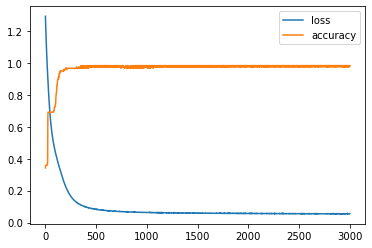

In [52]:
import matplotlib.pyplot as plt
plt.plot(hist.history["loss"], label="loss")
plt.plot(hist.history["accuracy"], label="accuracy")
plt.legend()

In [65]:
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras import models, layers

(x_tr, y_tr),(x_te, y_te)= boston_housing.load_data()

# 표준화
mean = x_tr.mean(axis=0)
x_tr -= mean
std = x_tr.std(axis=0)
x_tr/=std

x_te -=mean
x_te /= std

model= models.Sequential()
model.add(layers.Dense(64,activation="relu",input_shape=(x_tr.shape[1],)))
model.add(layers.Dense(64,activation="relu"))
model.add(layers.Dense(1))

model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])

# validation 훈련데이터의 일부분을 테스트 데이터로 사용하는 배율
hist = model.fit(x_tr, y_tr, epochs=50, batch_size=50,validation_split=0.2,
                verbose=0)
model.evaluate(x_te, y_te)

4/4 [==============================] - 0s 2ms/step - loss: 24.1971 - mae: 3.1940


[24.197113037109375, 3.1940436363220215]